In [1]:
import numpy as np
import matplotlib.pyplot as plt
from GaussianOptics import ThinLens,Gaussian_propagation2d,DrawBeamCountour,DrawBeamCountour2
c=299792458*1000

In [2]:
def focallength(R1,R2,t,n=1.57):
    #f = 1/((n-1)*(1/R1-1/R2+(n-1)*t/(n*R1*R2)))
    f = 1/(1/R1+1/R2)
    return f

In [7]:
#  Information about the CHAMP optics designed for CHAI receiver
#  Here the simulated design is the scale optics operating @ 158.33GHz
'''CHAMP informations'''
def Gauss_optics_spider(din2=170):
    freq=275*10**9
    Lambda1=c/freq
    win2=2.3 # mm 
    #f2 = focallength(447.33,-1343.696,29.976)
    f2 = focallength(169.095+29.976/2,-(261.995-29.976/2),29.976)
    P2=ThinLens(win2, din2, f2, Lambda1)
    Ls=364.925+29.976/2+30.509/2
    din1=Ls-P2['dout']
    #f1=focallength(9*10**30,-367.248,30.509)
    #f1=focallength(364.925+261.995+30.509/2,-367.248,30.509)
    f1 = 364.925+261.995+30.509/2
    P1=ThinLens(P2['wout'], din1, f1, Lambda1)
    return P2, P1


In [8]:
din = np.linspace(150,250,501)
wout_list = []
dout_list = []
Rout_list = []
for d in din:
    l2,l1 = Gauss_optics_spider(din2=d)
    wout_list.append(l1['wout'])
    dout_list .append(l1['dout'])
    Rout_list .append(l1['Rout'])

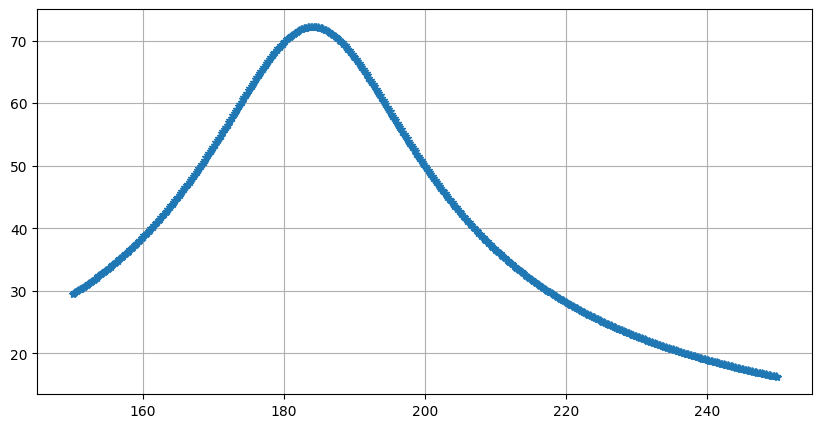

In [9]:
fig = plt.figure(figsize=(10,5))
plt.plot(din, wout_list,'*-')
plt.grid('on')

In [11]:
NN= np.where(np.array(wout_list) == np.array(wout_list).max())
din[NN]

array([184.])

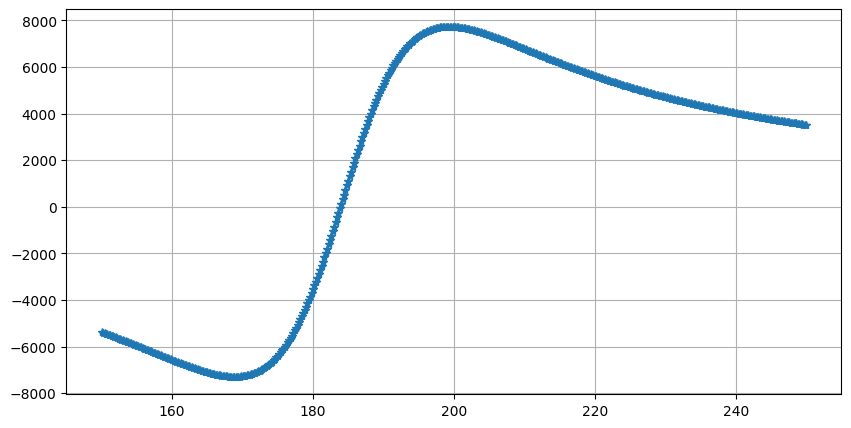

In [10]:
fig = plt.figure(figsize=(10,5))
plt.plot(din, dout_list,'*-')
plt.grid('on')

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.plot(din, Rout_list,'*-')
plt.grid('on')

In [ ]:
|